## Data Science
### Módulo 2 _ Machine Learning: Supervised Learning

#### SVM (Support Vector Machine)
 `Skillsforindustry.org`

We first import the libraries we will need for this exercise

In [1]:
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Cargar los Datos

In [9]:
datos = pd.read_csv('DatosMuestrasSVM.csv')
datos.head(3)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0


In [10]:
datos.shape

(200, 3)

El Dataset contiene observaciones simuladas con una función no lineal en un espacio de dos dimensiones (2 predictores). El objetivo es entrenar un modelo SVM capaz de clasificar las observaciones.

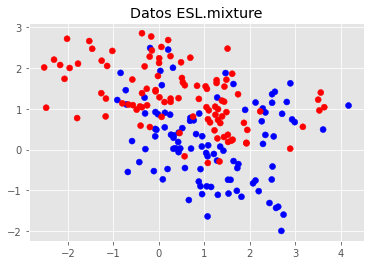

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y);
ax.set_title("Datos ESL.mixture");

# SVM lineal

En Scikit Learn pueden encontrarse tres implementaciones distintas del algoritmo Suport Vector Machine:

Las clases `sklearn.svm.SVC` y `sklearn.svm.NuSVC` permiten crear modelos SVM de clasificación empleando kernel lineal, polinomial, radial o sigmoide. La diferencia es que `SVC` controla la regularización a través del hiperparámetro C, mientras que `NuSVC` lo hace con el número máximo de vectores soporte permitidos.

La clase `sklearn.svm.LinearSVC` permite ajustar modelos SVM con kernel lineal. Es similar a SVC cuando el parámetro `kernel='linear'`, pero utiliza un algoritmo más rápido.

Las mismas implementaciones están disponibles para regresión en las clases: `sklearn.svm.SVR`, `sklearn.svm.NuSVR` y `sklearn.svm.LinearSVR`.

Se ajusta primero un modelo SVM con kernel lineal y después uno con kernel radial, y se compara la capacidad de cada uno para clasificar correctamente las observaciones.

###  División de los datos en train y test

In [12]:
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [13]:
# Creación del modelo SVM lineal
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

Al tratarse de un problema de dos dimensiones, se puede representar las regiones de clasificación.



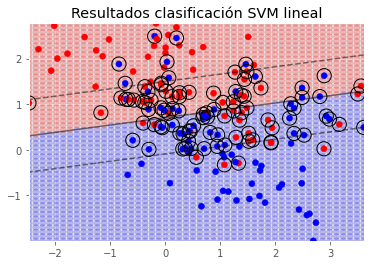

In [ ]:
# Representación gráfica de los límites de clasificación

# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [ ]:
grid

array([[-2.47741762, -1.9998534 ],
       [-2.47741762, -1.90240349],
       [-2.47741762, -1.80495357],
       ...,
       [ 3.61157467,  2.58029264],
       [ 3.61157467,  2.67774256],
       [ 3.61157467,  2.77519247]])

Se calcula el porcentaje de aciertos que tiene el modelo al predecir las observaciones de test (accuracy).



In [ ]:
# Predicciones test
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
# Accuracy de test del modelo 
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.0%


# SVM radial

Se repite el ajuste del modelo, esta vez empleando un kernel radial y utilizando `validación cruzada` para identificar el valor óptimo de penalización` C.`

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )


In [ ]:
# Se asigna el resultado a _ para que no se imprima por pantalla
X = X_train
y = y_train



In [ ]:
_ = grid.fit(X,y)

In [ ]:

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)').drop(columns = 'params').sort_values('mean_test_score', ascending = False).head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.12884,0.762520,0.023223,0.790778,0.035372
12,379.269,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.5867,0.738062,0.064044,0.859431,0.019840


In [ ]:
# Grid de hiperparámetros
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
8,1.12884,0.762520,0.023223,0.790778,0.035372
12,379.269,0.750641,0.076068,0.868777,0.007168
7,0.263665,0.750175,0.030408,0.778228,0.026049
9,4.83293,0.744118,0.044428,0.815729,0.026199
11,88.5867,0.738062,0.064044,0.859431,0.019840


In [ ]:
# Mejores hiperparámetros por validación cruzada
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 1.1288378916846884} : 0.7625203820172374 accuracy


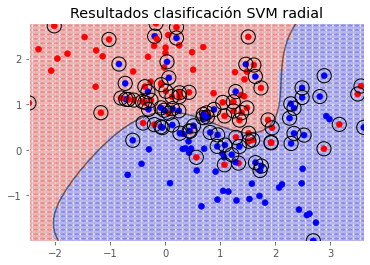

In [ ]:
# Representación gráfica de los límites de clasificación
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors='k',
    levels=[0],
    alpha=0.5,
    linestyles='-'
)

ax.set_title("Resultados clasificación SVM radial");

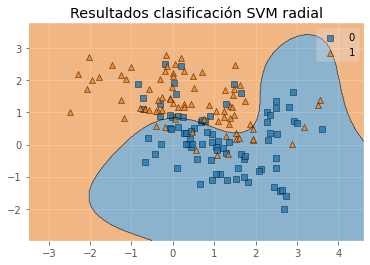

In [ ]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
fig, ax = plt.subplots(figsize=(6,4))
plot_decision_regions(
    X = X_train.to_numpy(),
    y = y_train.flatten(),
    clf = modelo,
    ax = ax
)
ax.set_title("Resultados clasificación SVM radial");

In [ ]:
# Predicciones test
predicciones = modelo.predict(X_test)

In [ ]:
# Accuracy de test del modelo 
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 80.0%


In [ ]:
# Matriz de confusión de las predicciones de test
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,14,3
1,5,18


Conclusión

Con un modelo SVM de kernel radial se consigue clasificar correctamente el 80% de las observaciones de test. Se podría intentar mejorar aún más el modelo optimizando el valor del hiperparámetro gamma o utilizando otro tipo de kernel.